In [4]:
# Single-Bit Parity Check
# Implement a single-bit parity check for 8-bit data.

# function to compute even parity bit
def compute_even_parity(data):
    return sum(data) % 2

# original data bits 
data = [1, 0, 1, 0, 1, 1, 0, 0]
parity_bit = compute_even_parity(data)
print("Original Data: ", data)
print("Computed Parity Bit (Even):", parity_bit)

# transmitted data - append parity bit to the data array
transmitted_data = data + [parity_bit]
print("\nTransmitted Data (Data + Parity):", transmitted_data)

# simulate an error - flip a bit in the transmitted data
error_index = 3
data_with_error = transmitted_data.copy()
data_with_error[error_index] = 1 - data_with_error[error_index]
print("\nData with an Error Introduced at index", error_index, ":", data_with_error)

# at the receiver perform the parity check.
if sum(data_with_error) % 2 == 0:
    print("\nNo error detected (Parity Check Passed)")
else:
    print("\nError detected (Parity Check Failed)")

Original Data:  [1, 0, 1, 0, 1, 1, 0, 0]
Computed Parity Bit (Even): 0

Transmitted Data (Data + Parity): [1, 0, 1, 0, 1, 1, 0, 0, 0]

Data with an Error Introduced at index 3 : [1, 0, 1, 1, 1, 1, 0, 0, 0]

Error detected (Parity Check Failed)


In [5]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
# 2D Parity Check
# Perform a 2D parity check to detect and correct errors in a block of data.
import numpy as np

# function to compute row and column parity for even parity
def compute_parity(mat):
    row_parity = np.sum(mat, axis=1) % 2  # Row-wise parity
    col_parity = np.sum(mat, axis=0) % 2  # Column-wise parity
    return row_parity, col_parity

# 4x4 data matrix
data = np.array([
    [1, 0, 1, 1],
    [0, 1, 0, 0],
    [1, 1, 1, 0],
    [0, 0, 1, 1]
])

print("Original Data:\n", data)

# compute original parity bits
row_par, col_par = compute_parity(data)
print("Row Parity:", row_par)
print("Column Parity:", col_par)

# introduce an error by flipping the bit at row 2, column 1 (0-indexed)
data_err = data.copy()
data_err[2, 1] = 1 - data_err[2, 1]
print("\nData with error at (2, 1):\n", data_err)

# recompute parity bits after error
new_row_par, new_col_par = compute_parity(data_err)
print("New Row Parity:", new_row_par)
print("New Column Parity:", new_col_par)

# detect and correct the error
err_row = np.where(new_row_par != row_par)[0]
err_col = np.where(new_col_par != col_par)[0]

if err_row.size == 1 and err_col.size == 1:
    error_location = (err_row[0], err_col[0])
    print("\nError detected at:", error_location)
    # correct the error by flipping the bit back
    data_err[error_location] = 1 - data_err[error_location]
    print("Corrected Data:\n", data_err)
else:
    print("No single-bit error detected or multiple errors occurred.")

Original Data:
 [[1 0 1 1]
 [0 1 0 0]
 [1 1 1 0]
 [0 0 1 1]]
Row Parity: [1 1 1 0]
Column Parity: [0 0 1 0]

Data with error at (2, 1):
 [[1 0 1 1]
 [0 1 0 0]
 [1 0 1 0]
 [0 0 1 1]]
New Row Parity: [1 1 0 0]
New Column Parity: [0 1 1 0]

Error detected at: (np.int64(2), np.int64(1))
Corrected Data:
 [[1 0 1 1]
 [0 1 0 0]
 [1 1 1 0]
 [0 0 1 1]]


In [7]:
# Checksum Using One's Complement'
# Implement a checksum using one's complement for error detection.

def ones_complement_sum(a, b, bit_size=16):
    """one's complement addition of two numbers."""
    result = a + b
    if result >= (1 << bit_size):  # if there is an overflow
        result = (result + 1) & ((1 << bit_size) - 1)  # wrap around carry
    return result

def calculate_checksum(data, bit_size=16):
    """one's complement checksum for a list of integers."""
    checksum = 0
    for word in data:
        checksum = ones_complement_sum(checksum, word, bit_size)
    return ~checksum & ((1 << bit_size) - 1)  # one's complement

def verify_checksum(data, received_checksum, bit_size=16):
    """verify the checksum by adding it to the computed sum."""
    total = 0
    for word in data:
        total = ones_complement_sum(total, word, bit_size)
    total = ones_complement_sum(total, received_checksum, bit_size)
    return total == (1 << bit_size) - 1  # valid if all bits are 1

# Example 
data = [0b1010101010101010, 0b1100110011001100, 0b1111000011110000]  # Example 16-bit words
checksum = calculate_checksum(data)
print(f"Calculated Checksum: {bin(checksum)}")

# verification
is_valid = verify_checksum(data, checksum)
print("Checksum is valid" if is_valid else "Checksum is invalid")

Calculated Checksum: 0b1001011110010111
Checksum is valid


In [8]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


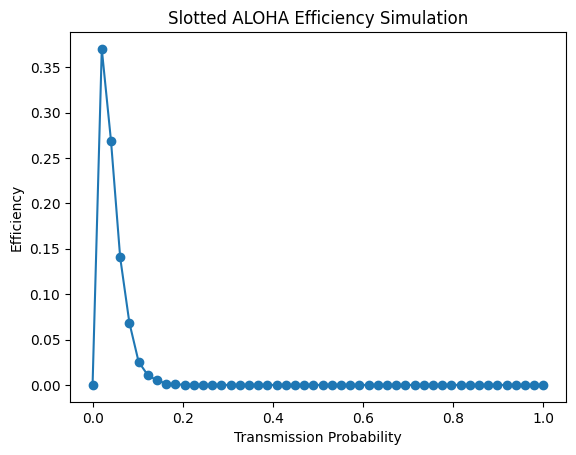

In [9]:
# Multiple Access Protocols (MAP)
# Model and compare the performance of Pure ALOHA, Slotted ALOHA, and CSMA/CD.

import random
import matplotlib.pyplot as plt
import numpy as np

def simulate_slotted_aloha(n_nodes, p, n_slots):
    successes = 0
    for _ in range(n_slots):
        # Each node transmits with probability p in a slot
        transmissions = sum(1 for _ in range(n_nodes) if random.random() < p)
        if transmissions == 1:
            successes += 1
    efficiency = successes / n_slots
    return efficiency

n_nodes = 50
ps = np.linspace(0, 1, 50)
efficiencies = [simulate_slotted_aloha(n_nodes, p, 10000) for p in ps]

plt.plot(ps, efficiencies, marker='o')
plt.xlabel('Transmission Probability')
plt.ylabel('Efficiency')
plt.title('Slotted ALOHA Efficiency Simulation')
plt.show()